# Philadelphia Crime Project
## CMSC320 Final Tutorial
### _Prit Patel, Ali Nili, Ali_ 



# Introduction 
This project is about Crime in Philadelphia

# Part - 1: Data Collection and Processing

In [119]:
!pip install folium
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import linear_model
import os
from folium import IFrame
from folium.plugins import MarkerCluster
import seaborn as sb
import matplotlib.dates as mdates
import datetime

import warnings
warnings.filterwarnings("ignore")

## Data Collection
This data is collected from Kaggle, https://www.kaggle.com/mchirico/philadelphiacrimedata. The data is in a CSV format in a 
file named crime.csv. After that it is loaded into a pandas dataframe to further process and visualize the data. 

This data contains information about crime in Philadephia from 2005 to 2017.  

In [144]:
# Date Parser for the data
dateparse = lambda d: datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S')

# Load the data into a dataframe.
df = pd.read_csv("crime.csv",
  header=0,names=['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Crime_Type',  'Police_Districts', 'Month', 'Longitude',
       'Latitude'],dtype={'Dc_Dist':str,'Psa':str,
                'Dispatch_Date_Time':str,'Dispatch_Date':str,'Dispatch_Time':str,
                  'Hour':str,'Dc_Key':str,'Location_Block':str,
                     'UCR_General':str,'Crime_Type':str,
              'Police_Districts':str,'Month':str,'Longitude':str,'Latitude':str},
             parse_dates=['Dispatch_Date_Time'],date_parser=dateparse)

# Fix Month to datetime Month
df['Month'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))
df.head()

Dc_Dist Psa  Dispatch_Date_Time Dispatch_Date Dispatch_Time Hour  \
0      18   3 2009-10-02 14:24:00    2009-10-02      14:24:00   14   
1      14   1 2009-05-10 00:55:00    2009-05-10      00:55:00    0   
2      25   J 2009-08-07 15:40:00    2009-08-07      15:40:00   15   
3      35   D 2009-07-19 01:09:00    2009-07-19      01:09:00    1   
4      09   R 2009-06-25 00:14:00    2009-06-25      00:14:00    0   

         Dc_Key            Location_Block UCR_General          Crime_Type  \
0  200918067518  S 38TH ST  / MARKETUT ST         800      Other Assaults   
1  200914033994          8500 BLOCK MITCH        2600  All Other Offenses   
2  200925083199               6TH CAMBRIA         800      Other Assaults   
3  200935061008       5500 BLOCK N 5TH ST        1500   Weapon Violations   
4  200909030511       1800 BLOCK WYLIE ST        2600  All Other Offenses   

  Police_Districts      Month   Longitude   Latitude  
0              NaN 2009-10-01         NaN        NaN  
1              NaN 2009-05-01         NaN        NaN  
2              NaN 2009-08-01         NaN        NaN  
3               20 2009-07-01  -75.130477  40.036389  
4                8 2009-06-01   -75.16635  39.969532

### Tidying the data
Remove all unnecessary columns from the table and tidy any other column that needs tidying. 

In [145]:
# First drop Location_Block, Dc_Key, Dc_Dist, Dispatch_Date_Time and Hour columns
df = df.drop('Location_Block', axis=1)
df = df.drop('Dc_Key', axis=1)
df = df.drop('Dc_Dist', axis=1)
df = df.drop('Dispatch_Date_Time', axis=1)
df = df.drop('Hour', axis=1)

# Then add two columns for Month and Year and change the name of the exisitng Month column to Crime_Date
df["Year"] = pd.DatetimeIndex(df["Month"]).year
df["Crime_Date"] = df["Month"]
df["Month"] = pd.DatetimeIndex(df["Crime_Date"]).month


# Here since this dataset is very large, dropping all NaN values would clean it without causing any bias
df2 = df.dropna()
df2 = df2[df2.Year != 2017]
df2.index = range(len(df2.index))
df2.head()

Psa Dispatch_Date Dispatch_Time UCR_General          Crime_Type  \
0   D    2009-07-19      01:09:00        1500   Weapon Violations   
1   R    2009-06-25      00:14:00        2600  All Other Offenses   
2   1    2015-04-25      12:50:00         600              Thefts   
3   K    2009-02-10      14:33:00         800      Other Assaults   
4   3    2015-10-06      18:18:00         600              Thefts   

  Police_Districts  Month   Longitude   Latitude  Year Crime_Date  
0               20      7  -75.130477  40.036389  2009 2009-07-01  
1                8      6   -75.16635  39.969532  2009 2009-06-01  
2               13      4  -75.166412   39.94007  2015 2015-04-01  
3               16      2  -75.171149  39.979586  2009 2009-02-01  
4               16     10  -75.160229  39.976134  2015 2015-10-01

# Part - 2: Data Visualization and Exploratory Analysis

At this point, the data is clean and ready for analsis. This part includes visualization of the data based on different 
factors like year, month, crime type. It also includes a map to better visualize crime in Philadephia. In the end it 
has statistical measurements to understand how the parameters vary. 

### Number of Crimes Commited per Year in Philadelphia
A Plot of total number of crimes commited in a given Month from 2006 to 2017.

Here as you can see in the graph below, the total number of crimes in Philadelphia seem to be decreasing with years.

Text(0.5, 1, 'Number of Crimes commited per year')

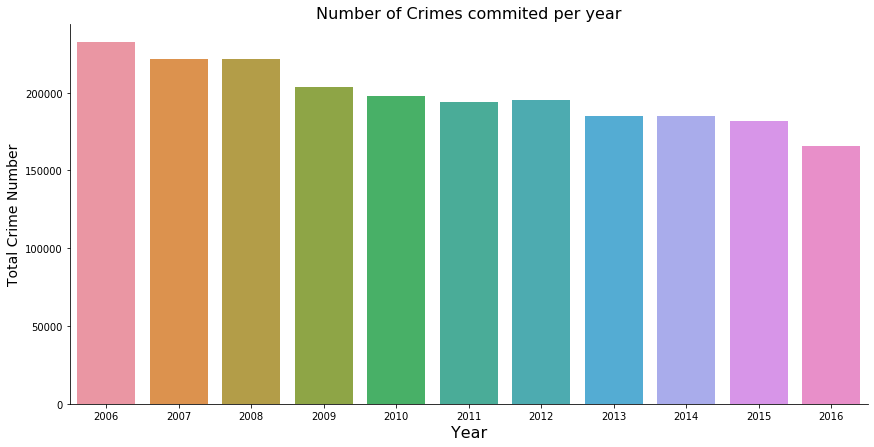

In [146]:
sb.catplot(x="Year", kind="count", height=6, aspect=2, data=df2)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total Crime Number", fontsize=14)
plt.title("Number of Crimes commited per year", fontsize=16)

### Number of Crimes Commited per Month in Philadelphia
A Plot of total number of crimes commited in a given Month from 2006 to 2017.
Here as you can see, the trend in crimes per Month doesn't look linear like the previous (Year) graph. Here it seems 
like more crimes happen in the middle of the year, compared to the start and end. 

Text(0.5, 1, 'Number of Crimes commited per Month')

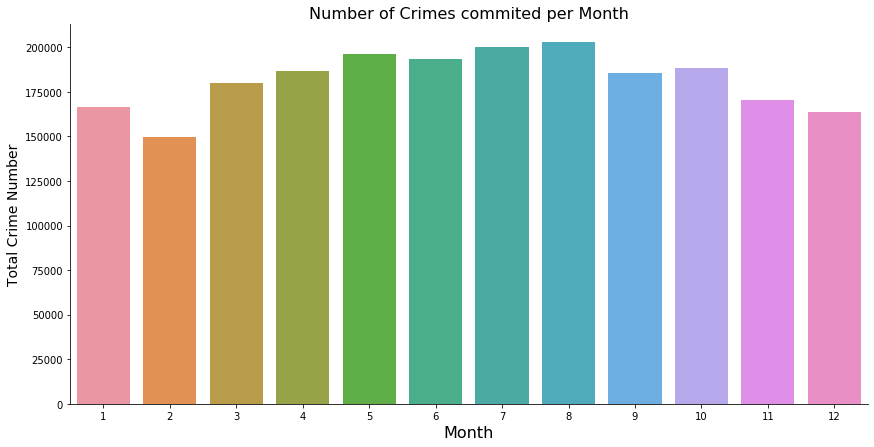

In [147]:
sb.catplot(x='Month', kind='count', height=6, aspect=2, data=df2)

plt.xlabel("Month", fontsize=16)
plt.ylabel("Total Crime Number", fontsize=14)
plt.title("Number of Crimes commited per Month", fontsize=16)

### Visualization of Crime by different types
There are 33 different types of Crimes and the following graph visualized the frequency of each of that type to better
understand how crime rates in Philadelphia are changing based on different types. 

Here it can be seen that the number of thefts, vandalism, drug violations, frauds and burglaries are higher than 
the number of Arsons, Rapes, Criminal Homicides, Public Drukenness and Embezzlements. 

Text(0.5, 1, 'Number of Times a Specific type of Crime was Commited')

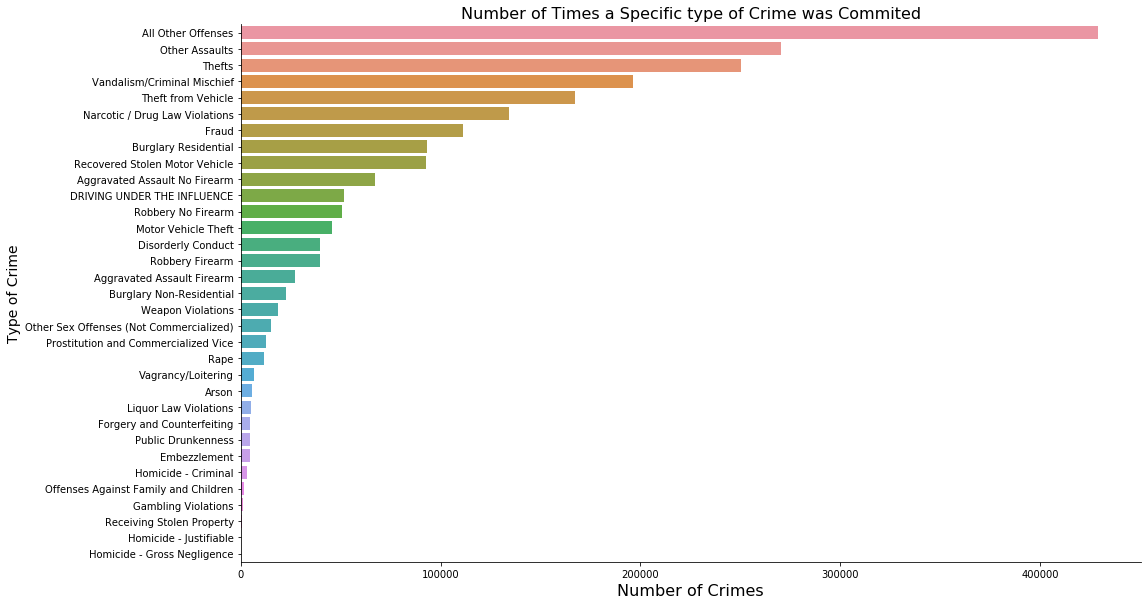

In [148]:
sb.catplot(y='Crime_Type', kind ='count', height=8, aspect=2, order=df2.Crime_Type.value_counts().index,
           data=df2)

plt.xlabel("Number of Crimes", fontsize=16)
plt.ylabel("Type of Crime", fontsize=14)
plt.title("Number of Times a Specific type of Crime was Commited", fontsize=16)

### Number of Crimes per Police District in Philadelphia
This graph shows the number of crimes per Police District in Philadelphia, it is ordered by the crime count. 

From the graph below it can be seen that the number of crimes commited per police district has a lot of disparities, 
with district 11 having the highest number and district 22 having the smallest number

Text(0.5, 1, 'Number of Crimes commited per Police District')

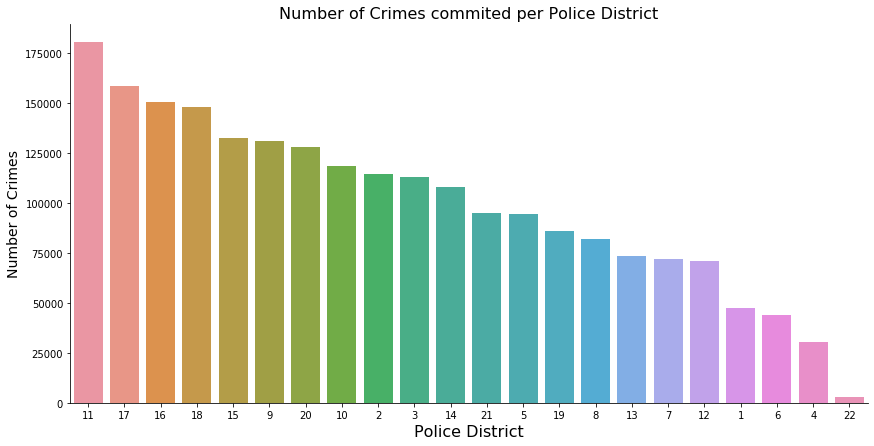

In [149]:
sb.catplot(x='Police_Districts', kind='count', height=6, aspect=2, order=df2.Police_Districts.value_counts().index, 
           data=df2)

plt.xlabel("Police District", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Number of Crimes commited per Police District", fontsize=16)

## Visualization using the Map of Philadelphia
This section uses the map of philadelphia to show the trends in Crime Data in Philadelphia for a better understanding of where in the city are most of the crimes concentrated. 

We have included three maps: 
1. This one shows all crimes in 2016, which helps see which regions are safe / unsafe.
2. This one shows heatmap of dangerous crimes from 2011 to 2016, which shows where most dangerous crimes are concentrated.
3. This one shows heatmap of thefts from 2015 to 2016, which shows where most thefts occur.

Note that the reason for using different years is mainly because folium maps don't fetch for a dataset larger than a certain number

### Visualization of all crimes in 2016
This map below shows the heatmap of crimes that happened in 2016. Here the Black color represents dangerous crimes, blue color represents thefts and cyan color represents other smaller crimes. 

It is evident (just as expected) that number of dangerous crimes is less than thefts which is less than small crimes.

This graph uses a random sample of size 42,000 because for values higher than that the map doesn't render and using a random sample takes care of any bias that might occur when using a sample of the population.

In [150]:
from folium.plugins import HeatMap
from folium import plugins
from folium import FeatureGroup
from folium import IFrame
from folium.plugins import MarkerCluster
from random import randint

dangerous = ['Weapon Violations', 'Robbery Firearm', 'Homicide - Criminal', 'Aggravated Assault Firearm', 
             'Homicide - Gross Negligence', 'Homicide - Justifiable', 'Rape']

theft = ['Thefts', 'Theft from Vehicle', 'Motor Vehicle Theft', 'Receiving Stolen Property', 
         'Recovered Stolen Motor Vehicle']

map_osm = folium.Map(location=[39.95,-75.16], zoom_start=11)
arrest_loc = FeatureGroup(name="Crime")

temp_data = df2.sample(n=42000)[df2.Year == 2016]

for i,row in temp_data.iterrows():
    if row['Crime_Type'] in dangerous:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='black',fill=True))
    elif row['Crime_Type'] in theft:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='blue',fill=True))
    else:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='cyan',fill=True))
    
map_osm.add_child(arrest_loc)
map_osm.add_child(folium.map.LayerControl())
map_osm

### Visualization of "Violent" Crimes in the from 2011 - 2016
This graph visualizes a heat map of the Violent crimes commited between 2011 and 2016 included. Here violent crimes
include Weapon Violations, Robbery Firearm, Homicides, Aggravated Assaults and Rapes.

This graph shows where dangerous crimes happen most often

We have restricted the years from 2011 to 2016 because a large dataset causes problems with the Map.

In [151]:
map_osm2 = folium.Map(location=[39.95,-75.16], zoom_start=11)

# creating a new dataframe with all the dangerous crimes in it
dangerous_data = df2[df2['Crime_Type'].isin(dangerous)]

# Add data for heatmp 
data_heatmap = dangerous_data[dangerous_data.Year > 2010]
data_heatmap = data_heatmap[['Latitude','Longitude']]
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(map_osm2)

map_osm2

### Visualization of "Thefts" Crimes in the from 2015 - 2016
This graph visualizes a heat map of the thefts commited between 2011 and 2016 included. Here thefts include Thefts, Theft from Vehicle, Motor Vehicle Theft, Receiving Stolen Property, Recovered Stolen Motor Vehicle.

This graph shows where thefts crimes happen most often

We have restricted the years from 2015 to 2016 because a large dataset causes problems with fetching the Map. But the sample here is large enough to give us a good idea of the actual data.

In [152]:
map_osm3 = folium.Map(location=[39.95,-75.16], zoom_start=11)

# creating a new dataframe with all the thefts crimes in it
theft_data = df2[df2['Crime_Type'].isin(theft)]

# Add data for heatmp 
data_heatmap = theft_data[theft_data.Year > 2014].sample(frac=0.7)
data_heatmap = data_heatmap[['Latitude','Longitude']]
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(map_osm3)

map_osm3

# Part - 3: Hypothesis Testing and ML

Regression by Year and crime count.

# Conclusion

## References
- Dataset: https://www.kaggle.com/mchirico/philadelphiacrimedata
- 